In [1]:
import dash
from dash.dependencies import Input, Output
import dash_core_components as dcc
import dash_html_components as html
from loremipsum import get_sentences

import pandas as pd
import numpy as np

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *

from textwrap import dedent as s



## RNA zscore heatmap

In [2]:
rna_1 = pd.read_csv('https://raw.githubusercontent.com/YunMai-SPS/DA608_homework/master/DA608_final_project/data/data_RNA_Seq_v2_mRNA_median_Zscores_1.csv',low_memory=False)

rna_2= pd.read_csv('https://raw.githubusercontent.com/YunMai-SPS/DA608_homework/master/DA608_final_project/data/data_RNA_Seq_v2_mRNA_median_Zscores_2.csv',low_memory=False,header=None)
rna_2.columns = rna_1.columns

rna_3= pd.read_csv('https://raw.githubusercontent.com/YunMai-SPS/DA608_homework/master/DA608_final_project/data/data_RNA_Seq_v2_mRNA_median_Zscores_3.csv',low_memory=False,header=None)
rna_3.columns = rna_1.columns

rna = pd.concat([rna_1, rna_2, rna_3])
rna.head(2)

,Hugo_Symbol,Entrez_Gene_Id,TCGA-AB-2803-03,TCGA-AB-2805-03,TCGA-AB-2806-03,TCGA-AB-2807-03,TCGA-AB-2808-03,TCGA-AB-2810-03,TCGA-AB-2811-03,TCGA-AB-2812-03,...,TCGA-AB-3000-03,TCGA-AB-3001-03,TCGA-AB-3002-03,TCGA-AB-3005-03,TCGA-AB-3006-03,TCGA-AB-3007-03,TCGA-AB-3008-03,TCGA-AB-3009-03,TCGA-AB-3011-03,TCGA-AB-3012-03
0,HMGB1P1,10357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LOC155060,155060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#clean up data
rtem = rna.copy()
rtem.dropna(inplace= True)
a=rtem.Hugo_Symbol

dup = a[a.duplicated(keep=False)]
to_remove = list(set(dup))

rtem= rtem[~rtem['Hugo_Symbol'].isin(to_remove)]
rtem.shape

(18750, 175)

view the distributinon of RNA expression level for one gene

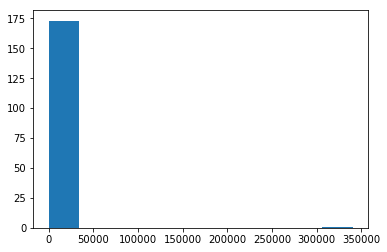

In [4]:
import matplotlib.pyplot as plt
plt.hist(rtem.iloc[0].values[-174:])
plt.show()

## Mutation

In [5]:
mutation = pd.read_csv('https://raw.githubusercontent.com/YunMai-SPS/DA608_homework/master/DA608_final_project/data/data_mutations_extended.csv',low_memory=False)
mutation.shape

(2532, 179)

In [6]:
mutation.head(2)

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,ONCOTATOR_PROTEIN_POS_END_BEST_EFFECT,NormalRefReads_WU,NormalVarReads_WU,NormalVAF_WU,TumorRefReads_WU,TumorVarReads_WU,TumorVAF_WU,RNARefReads_WU,RNAVarReads_WU,RNAVAF_WU
0,TBX15,0,genome.wustl.edu,GRCh37,1,119469161,119469161,-1.0,Missense_Mutation,SNP,...,NaN,468.0,7.0,1.47,120.0,54.0,30.68,NaN,NaN,NaN
1,TCHHL1,0,genome.wustl.edu,GRCh37,1,152057522,152057522,-1.0,Missense_Mutation,SNP,...,NaN,743.0,4.0,0.54,142.0,78.0,35.14,NaN,NaN,NaN


In [7]:
# use TumorVAF_WU as values in the gene-MtationType matrix
mutation_matrix = mutation.pivot_table(columns='Hugo_Symbol',index='Variant_Classification',values='TumorVAF_WU')
list(mutation_matrix.index)


["3'Flank",
 "3'UTR",
 "5'Flank",
 "5'UTR",
 'Frame_Shift_Del',
 'Frame_Shift_Ins',
 'IGR',
 'In_Frame_Del',
 'In_Frame_Ins',
 'Intron',
 'Missense_Mutation',
 'Nonsense_Mutation',
 'RNA',
 'Silent',
 'Splice_Region',
 'Splice_Site',
 'Translation_Start_Site']

In [8]:
mutation.Variant_Classification.unique()

array(['Missense_Mutation', 'Silent', 'Frame_Shift_Ins', 'RNA',
       'Frame_Shift_Del', 'Intron', "3'Flank", "5'UTR",
       'Nonsense_Mutation', "5'Flank", 'Splice_Site', 'In_Frame_Del',
       'In_Frame_Ins', 'Splice_Region', 'IGR', 'Translation_Start_Site',
       "3'UTR"], dtype=object)

convert the data to a MutationType-gene matrix

In [9]:
mutation.Variant_Type.unique()

array(['SNP', 'INS', 'DEL'], dtype=object)

In [10]:
mu_temp = mutation.copy()
mapping_items =  {'SNP':1, 'INS':2, 'DEL':3}
mu_temp.Variant_Type = mu_temp.Variant_Type.map(mapping_items)

In [11]:
# use Variant_Type as values in the MtationType-gene matrix
mutation_matrix_2 =mu_temp.pivot_table(columns='Hugo_Symbol',index='Variant_Classification',values='Variant_Type',aggfunc='first')
mutation_matrix_2

Hugo_Symbol,14-Sep,ABCA10,ABCA4,ABCB11,ABCC11,ABCC3,ABCF1,ABCG4,ABCG8,ABL1,...,ZNF783,ZNF788,ZNF827,ZNF99,ZPBP,ZSCAN21,ZSCAN5A,ZYG11A,hsa-mir-490,snoU13
Variant_Classification,,,,,,,,,,,,,,,,,,,,,
3'Flank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5'Flank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frame_Shift_Del,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frame_Shift_Ins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
In_Frame_Del,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
In_Frame_Ins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# copy the matrix
mutation_matrix_intm = mutation_matrix_2.copy()

# only keep 'SNP'(donoted as 1) for trace0 of heatmap
replace_items =  {2:np.nan, 3:np.nan}
mutation_matrix_snp = mutation_matrix_intm.replace(replace_items)

mutation_matrix_snp

Hugo_Symbol,14-Sep,ABCA10,ABCA4,ABCB11,ABCC11,ABCC3,ABCF1,ABCG4,ABCG8,ABL1,...,ZNF783,ZNF788,ZNF827,ZNF99,ZPBP,ZSCAN21,ZSCAN5A,ZYG11A,hsa-mir-490,snoU13
Variant_Classification,,,,,,,,,,,,,,,,,,,,,
3'Flank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5'Flank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frame_Shift_Del,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frame_Shift_Ins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
In_Frame_Del,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
In_Frame_Ins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# only keep 'INS'(donoted as 2) for trace1 of heatmap
replace_items =  {1:np.nan, 3:np.nan}
mutation_matrix_ins = mutation_matrix_intm.replace(replace_items)

mutation_matrix_ins

Hugo_Symbol,14-Sep,ABCA10,ABCA4,ABCB11,ABCC11,ABCC3,ABCF1,ABCG4,ABCG8,ABL1,...,ZNF783,ZNF788,ZNF827,ZNF99,ZPBP,ZSCAN21,ZSCAN5A,ZYG11A,hsa-mir-490,snoU13
Variant_Classification,,,,,,,,,,,,,,,,,,,,,
3'Flank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5'Flank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frame_Shift_Del,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frame_Shift_Ins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
In_Frame_Del,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
In_Frame_Ins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# only keep 'DEL'(donoted as 3) for trace2 of heatmap
replace_items =  {1:np.nan, 2:np.nan}
mutation_matrix_del = mutation_matrix_intm.replace(replace_items)

mutation_matrix_del

Hugo_Symbol,14-Sep,ABCA10,ABCA4,ABCB11,ABCC11,ABCC3,ABCF1,ABCG4,ABCG8,ABL1,...,ZNF783,ZNF788,ZNF827,ZNF99,ZPBP,ZSCAN21,ZSCAN5A,ZYG11A,hsa-mir-490,snoU13
Variant_Classification,,,,,,,,,,,,,,,,,,,,,
3'Flank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5'Flank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frame_Shift_Del,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frame_Shift_Ins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
In_Frame_Del,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
In_Frame_Ins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
mutation.IMPACT.unique()

array(['MODERATE', 'LOW', 'HIGH', 'MODIFIER'], dtype=object)

In [16]:
mu_pat_temp = mutation.copy()
mapping_items =  {'MODERATE':1, 'LOW':2, 'HIGH':3, 'MODIFIER':4}
mu_pat_temp.IMPACT = mu_pat_temp.IMPACT.map(mapping_items)

In [17]:
# use TumorVAF_WU as values in the gene-Tumor_Sample_Barcode matrix
mutation_patient_matrix = mu_pat_temp.pivot_table(columns='Tumor_Sample_Barcode',index='Variant_Classification',values='IMPACT',aggfunc='first')
mutation_patient_matrix

Tumor_Sample_Barcode,TCGA-AB-2802-03,TCGA-AB-2803-03,TCGA-AB-2804-03,TCGA-AB-2805-03,TCGA-AB-2806-03,TCGA-AB-2807-03,TCGA-AB-2808-03,TCGA-AB-2809-03,TCGA-AB-2810-03,TCGA-AB-2811-03,...,TCGA-AB-3000-03,TCGA-AB-3001-03,TCGA-AB-3002-03,TCGA-AB-3005-03,TCGA-AB-3006-03,TCGA-AB-3007-03,TCGA-AB-3008-03,TCGA-AB-3009-03,TCGA-AB-3011-03,TCGA-AB-3012-03
Variant_Classification,,,,,,,,,,,,,,,,,,,,,
3'Flank,NaN,NaN,4.0,4.0,4.0,NaN,4.0,NaN,4.0,NaN,...,4.0,NaN,4.0,4.0,NaN,4.0,4.0,4.0,NaN,NaN
3'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5'Flank,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5'UTR,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,4.0,4.0,NaN,NaN,NaN,NaN
Frame_Shift_Del,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
Frame_Shift_Ins,3.0,NaN,3.0,3.0,3.0,NaN,NaN,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
IGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN
In_Frame_Del,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
In_Frame_Ins,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN


In [18]:
'MODERATE', 'LOW', 'HIGH', 'MODIFIER'

('MODERATE', 'LOW', 'HIGH', 'MODIFIER')

In [19]:
# copy the matrix
mutpat_matrix_intm = mutation_patient_matrix.copy()

# only keep 'MODERATE'(donoted as 1) for trace0 of heatmap
replace_items =  {2:np.nan, 3:np.nan, 4:np.nan}
mutation_matrix_moderate = mutpat_matrix_intm.replace(replace_items)

mutation_matrix_moderate

Tumor_Sample_Barcode,TCGA-AB-2802-03,TCGA-AB-2803-03,TCGA-AB-2804-03,TCGA-AB-2805-03,TCGA-AB-2806-03,TCGA-AB-2807-03,TCGA-AB-2808-03,TCGA-AB-2809-03,TCGA-AB-2810-03,TCGA-AB-2811-03,...,TCGA-AB-3000-03,TCGA-AB-3001-03,TCGA-AB-3002-03,TCGA-AB-3005-03,TCGA-AB-3006-03,TCGA-AB-3007-03,TCGA-AB-3008-03,TCGA-AB-3009-03,TCGA-AB-3011-03,TCGA-AB-3012-03
Variant_Classification,,,,,,,,,,,,,,,,,,,,,
3'Flank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5'Flank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frame_Shift_Del,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frame_Shift_Ins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
In_Frame_Del,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
In_Frame_Ins,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN


In [20]:
# only keep 'LOW'(donoted as 2) for trace0 of heatmap
replace_items =  {1:np.nan, 3:np.nan, 4:np.nan}
mutation_matrix_low = mutpat_matrix_intm.replace(replace_items)

mutation_matrix_low

Tumor_Sample_Barcode,TCGA-AB-2802-03,TCGA-AB-2803-03,TCGA-AB-2804-03,TCGA-AB-2805-03,TCGA-AB-2806-03,TCGA-AB-2807-03,TCGA-AB-2808-03,TCGA-AB-2809-03,TCGA-AB-2810-03,TCGA-AB-2811-03,...,TCGA-AB-3000-03,TCGA-AB-3001-03,TCGA-AB-3002-03,TCGA-AB-3005-03,TCGA-AB-3006-03,TCGA-AB-3007-03,TCGA-AB-3008-03,TCGA-AB-3009-03,TCGA-AB-3011-03,TCGA-AB-3012-03
Variant_Classification,,,,,,,,,,,,,,,,,,,,,
3'Flank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5'Flank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frame_Shift_Del,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frame_Shift_Ins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
In_Frame_Del,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
In_Frame_Ins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# only keep 'HIGH'(donoted as 3) for trace0 of heatmap
replace_items =  {1:np.nan, 2:np.nan, 4:np.nan}
mutation_matrix_high = mutpat_matrix_intm.replace(replace_items)

mutation_matrix_high

Tumor_Sample_Barcode,TCGA-AB-2802-03,TCGA-AB-2803-03,TCGA-AB-2804-03,TCGA-AB-2805-03,TCGA-AB-2806-03,TCGA-AB-2807-03,TCGA-AB-2808-03,TCGA-AB-2809-03,TCGA-AB-2810-03,TCGA-AB-2811-03,...,TCGA-AB-3000-03,TCGA-AB-3001-03,TCGA-AB-3002-03,TCGA-AB-3005-03,TCGA-AB-3006-03,TCGA-AB-3007-03,TCGA-AB-3008-03,TCGA-AB-3009-03,TCGA-AB-3011-03,TCGA-AB-3012-03
Variant_Classification,,,,,,,,,,,,,,,,,,,,,
3'Flank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5'Flank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frame_Shift_Del,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
Frame_Shift_Ins,3.0,NaN,3.0,3.0,3.0,NaN,NaN,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
IGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
In_Frame_Del,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
In_Frame_Ins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# only keep 'MODIFIER'(donoted as 4) for trace0 of heatmap
replace_items =  {1:np.nan, 2:np.nan, 3:np.nan}
mutation_matrix_modifier =mutpat_matrix_intm.replace(replace_items)

mutation_matrix_modifier

Tumor_Sample_Barcode,TCGA-AB-2802-03,TCGA-AB-2803-03,TCGA-AB-2804-03,TCGA-AB-2805-03,TCGA-AB-2806-03,TCGA-AB-2807-03,TCGA-AB-2808-03,TCGA-AB-2809-03,TCGA-AB-2810-03,TCGA-AB-2811-03,...,TCGA-AB-3000-03,TCGA-AB-3001-03,TCGA-AB-3002-03,TCGA-AB-3005-03,TCGA-AB-3006-03,TCGA-AB-3007-03,TCGA-AB-3008-03,TCGA-AB-3009-03,TCGA-AB-3011-03,TCGA-AB-3012-03
Variant_Classification,,,,,,,,,,,,,,,,,,,,,
3'Flank,NaN,NaN,4.0,4.0,4.0,NaN,4.0,NaN,4.0,NaN,...,4.0,NaN,4.0,4.0,NaN,4.0,4.0,4.0,NaN,NaN
3'UTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5'Flank,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5'UTR,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,4.0,4.0,NaN,NaN,NaN,NaN
Frame_Shift_Del,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frame_Shift_Ins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN
In_Frame_Del,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
In_Frame_Ins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Gene Fusion Data

In [23]:
fusion = pd.read_csv('https://raw.githubusercontent.com/YunMai-SPS/DA608_homework/master/DA608_final_project/data/data_fusions.csv',low_memory = False)
fusion.head(2)

,Hugo_Symbol,Entrez_Gene_Id,Center,Tumor_Sample_Barcode,Fusion,DNA support,RNA support,Method,Frame
0,IFNGR2,NaN,washu.edu,TCGA-AB-2908-03,IFNGR2(+)GART(+) fusion (Unknown frame),unknown,unknown,unknown,unknown
1,PML,NaN,washu.edu,TCGA-AB-2803-03,PML(+)RARA(+) fusion (In-frame),unknown,unknown,unknown,unknown


In [24]:

# extract the target genes and put them into new column 'target'
a = fusion.Fusion.str.replace(')','(')
b = a.str.split('(')
c = pd.DataFrame(list(b))
c.drop(c.columns[[0,4,6]],axis=1,inplace=True)
c.columns = ['seed_direction','target','target_direction','fusion_type']

# add new column 'fusion_values', 1 denoted as there is fusion between the gene(Hugo_Symbol) of that row and the target gene
fusion_new = pd.concat([fusion,c], axis=1)
fusion_new['fusion_values'] = 1

#pivot the data to form gene vs. gene matrix
temp = fusion_new[['Hugo_Symbol','target','fusion_values']]
pivoted_temp = temp.pivot_table(index='Hugo_Symbol',columns='target',values='fusion_values')
dif = list(set(temp['Hugo_Symbol']) - set(temp['target']))
pivoted_temp_1 = pivoted_temp[~pivoted_temp.index.isin(dif)]
pivoted_temp_2 = pivoted_temp[pivoted_temp.index.isin(dif)]
rearrange_pivoted = pd.concat([pivoted_temp_1,pivoted_temp_2])
rearrange_pivoted = rearrange_pivoted[pivoted_temp_1.index]

#isolate the gene-to-gene data for those genes that do not appear in the target list 
lower_left_matrix = rearrange_pivoted.loc[dif,:]
lower_right_matrix = pd.DataFrame(np.nan, index=dif, columns=dif)
dif_matrix = pd.concat([lower_left_matrix,lower_right_matrix],axis=1)

fusion_matrix = pd.concat([rearrange_pivoted,dif_matrix.T],axis=1)

fusion_matrix = fusion_matrix.fillna(0)

#convert to numpy array
fution_matrix_Ar = np.array(fusion_matrix)

# The App

In [26]:
app = dash.Dash()

app.config.suppress_callback_exceptions = True

# get data ready for RNA expression figure
df = rtem
gene_list = rtem.Hugo_Symbol
patient_list = rtem.columns[-(len(rtem.columns)-2):]

app.layout = html.Div([
    dcc.Location(id='url', refresh=False),
    html.Div(id='page-content')
])

index_page = html.Div([
    dcc.Link('Gene Expression', href='/page-1'),
    html.Br(),
    dcc.Link('Gene Mutations', href='/page-2'),
    html.Br(),
    dcc.Link('Gene Fusion', href='/page-3'),
    html.Br(),
    dcc.Markdown(s('''
    # DATA608 Final Project: Gene Mutations in Acute Myeloid Leukemia
    
    #### Author Yun Mai

    ### Overview
    
        This project analyzes gene sequencing data of a study of acute myeloid leukemia of 200 adult cases.
    
    The goal of this project is to show the genomic landscapes of adult de novo acute myeloid leukemia,
    
    including gene expression, mutation, and translocation.

    ### Data:  TCGA Acute Myeloid Leukemia, analysis of 200 adult cases (NEJM 2013)

    ### Visualization Tools:
    
    * Plotly [links](https://plot.ly/)
    * Dash  [links](https://plot.ly/products/dash/)

    ### Source
    cBioPortal 

    '''))
])



page_1_layout = html.Div([
    
    html.Div([
        html.H2('Gene Expression'),
        html.I('Author: Yun Mai'),
        html.Br(),
        dcc.Link('Gene Mutation', href='/page-2'),
        html.Br(),
        dcc.Link('Gene Fusion', href='/page-3'),
        html.Br(),
        dcc.Link('Go back to home', href='/')
    ]),
    
    html.Div([

        html.Div([
            dcc.Dropdown(
                id='gene_set_select',
                options=[{'label': '1-100', 'value': 100},
                         {'label': '1-200', 'value': 200},
                         {'label': '1-500', 'value': 500},
                         {'label': '1-1000', 'value': 1000},
                         {'label': '1-5000', 'value': 5000},
                         {'label': '1-10000', 'value': 10000},
                         {'label': '1-'+str(len(rtem.index)), 'value': len(rtem.index)}
                        ],
                value=100
            ),
            
        ],
        style={'width': '49%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                id='crossfilter-yaxis-column',
                options=[{'label': i, 'value': i} for i in gene_list],
                value='CXORF67'
            ),
        ], 
        style={'width': '24%', 'display': 'inline-block'}),
        
        html.Div([
            dcc.Dropdown(
                id='crossfilter-xaxis-column',
                options=[{'label': i, 'value': i} for i in patient_list],
                value='TCGA-AB-2803-03'
            ),
        ], 
        style={'width': '24%', 'display': 'inline-block'})
        
    ], style={
        'borderBottom': 'thin lightgrey solid',
        'backgroundColor': 'rgb(250, 250, 250)',
        'padding': '10px 5px'
    }),

    html.Div([
        dcc.Graph(
            id='crossfilter-heatmap',
            hoverData={'points': [{'x': 'TCGA-AB-2803-03','y': 'CXORF67','z':0.6974}]}
        )
    ], style={'width': '49%', 'display': 'inline-block', 'padding': '5 20'}),
    
    html.Div([
        dcc.Graph(id='selected_gene_inAllPatient'),
        dcc.Graph(id='selected_patient_AllGene'),
    ], style={'display': 'inline-block', 'width': '49%'}),

    html.Div(dcc.Slider(
        id='crossfilter-geneset-size',
        min=100,
        max=len(gene_list),
        value=100,
        step=None,
        marks={i: 'Size {}'.format(i) for i in [100,200,500,1000,5000,10000,len(rtem.index)]}
    ), 
    style={'width': '80%', 'padding': '100px 100px 100px 100px'})
])


@app.callback( dash.dependencies.Output('crossfilter-heatmap', 'figure'),
    [dash.dependencies.Input('gene_set_select', 'value')])
def show_rna_heatmap(data_set_size):
  
    df = rtem[0:data_set_size]
    
    df_value = df.loc[:, (rtem.columns != 'Hugo_Symbol') & (rtem.columns !='Entrez_Gene_Id')]
    z = df_value.values.tolist()

    return {
        'data':[go.Heatmap(
            z=z,
            x=df.columns[-(len(df.columns)-2):],
            y=df.Hugo_Symbol,
            zmin=0,
            zmax=11,
            colorscale=[
                [0.0, 'rgb(49,54,149)'], 
                [0.020, 'rgb(69,117,180)'],  
                [0.040, 'rgb(116,173,209)'],  
                [0.080, 'rgb(171,217,233)'],  
                [0.160, 'rgb(224,243,248)'],  
                [0.320, 'rgb(254,224,144)'],  
                [0.500, 'rgb(253,174,97)'],  
                [0.600, 'rgb(244,109,67)'],  
                [0.800, 'rgb(215,48,39)'],  
                [1.0, 'rgb(165,0,38)']]          
        )],
        'layout': go.Layout(
            title='',
            xaxis={
                'ticks':'',
                'nticks': 30
            },
            yaxis={
                'ticks':'',
                'nticks': 50
            },
            margin={'l': 80, 'b': 150, 't': 10, 'r': 0},
            height=600,
            hovermode='closest'
        )
    }
def show_pointDetail_gene(dff, title):
    
    return {
        'data': [go.Scatter(
            x=dff.columns[-(len(dff.columns)-2):],
            y=dff.iloc[0,2:],
            mode='lines+markers')                 
        ],
        'layout': {
            'height': 300,
            'margin': {'l': 20, 'b': 150, 'r': 10, 't': 10},
            #'showlegend':True,
            'annotations': [{
                'x': 0, 'y': 0.85, 'xanchor': 'left', 'yanchor': 'bottom',
                'xref': 'paper', 'yref': 'paper', 'showarrow': False,
                'align': 'left', 'bgcolor': 'rgba(255, 255, 255, 0.5)',
                'text': title
            }],
            #'yaxis': {'type': 'linear' if axis_type == 'Linear' else 'log'},
            'xaxis': {'showgrid': False}
        }
    }

def show_pointDetail_patient(dff, title):
    
    return {
        'data': [go.Scatter(
            x=rtem.Hugo_Symbol,
            y=dff,
            mode='lines+markers')                 
        ],
        'layout': {
            'height': 300,
            'margin': {'l': 20, 'b': 80, 'r': 10, 't': 10},
            #'showlegend':True,
            'annotations': [{
                'x': 0, 'y': 0.85, 'xanchor': 'left', 'yanchor': 'bottom',
                'xref': 'paper', 'yref': 'paper', 'showarrow': False,
                'align': 'left', 'bgcolor': 'rgba(255, 255, 255, 0.5)',
                'text': title
            }],
            #'yaxis': {'type': 'linear' if axis_type == 'Linear' else 'log'},
            'xaxis': {'showgrid': False}
        }
    }

@app.callback(
    dash.dependencies.Output('selected_gene_inAllPatient', 'figure'),
    [dash.dependencies.Input('crossfilter-yaxis-column', 'value')
     ])
def cna_in_allPatient(gene_name):
    dff = df[df.Hugo_Symbol == gene_name]
    title = '<b>{}</b>'.format(gene_name)
    return show_pointDetail_gene(dff, title)

@app.callback(
    dash.dependencies.Output('selected_patient_AllGene', 'figure'),
    [dash.dependencies.Input('crossfilter-xaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-geneset-size', 'value')
     ])
def allcna_in_onePatient(patient_id,gene_size):
    dff = df[patient_id]
    dff = dff[0:gene_size]
    title = '<b>{}</b>'.format(patient_id)
    return show_pointDetail_patient(dff, title)


page_2_layout = html.Div([
    html.Div([
        dcc.Link('Gene Expression', href='/page-1'),
        html.Br(),
        dcc.Link('Gene Fusion', href='/page-3'),
        html.Br(),
        dcc.Link('Go back to home', href='/'),
        html.H2('Gene Mutation'),
        html.I('Author: Yun Mai')
    ]),
    
    html.Div([
            dcc.Tabs(
            tabs=[
                {'label': 'Mutation Types', 'value': 1},
                {'label': 'Gene Fusion', 'value': 2},
            ],
            value=1,
            id='tabs'
        ),
        html.Div(id='tab-output')
    ], style={
        'width': '90%',
        'fontFamily': 'Sans-Serif',
        'margin-left': 'auto',
        'margin-right': 'auto'
    })
    
])

@app.callback(Output('tab-output', 'children'), [Input('tabs', 'value')])
def display_content(value):     
    data = [
        {
            'x': list(mutation_matrix.columns),
            'y': list(mutation_matrix.index),
            'z': list(mutation_matrix.values), 
            #'name': 'Gene Mutation',
            'type': ['heatmap','bar'][int(value)]
        }
        
        
    ]

    return html.Div([
        dcc.Graph(
            id='graph',
            figure={
                'data': data,
                'layout': {
                    'margin': {
                        'l': 150,
                        'r': 100,
                        'b': 110,
                        't': 100
                    },
                    'legend': {'x': 0, 'y': 1}
                }
            }
        )
    ])

page_3_layout = html.Div(
    children=[
        dcc.Link('Gene Expression', href='/page-1'),
        html.Br(),
        dcc.Link('Gene Mutation', href='/page-2'),
        html.Br(),
        dcc.Link('Go back to home', href='/'),

        html.H1('Gene Fusion'),
        html.Hr,
        html.H4('fusion gene shows two previously separate genes form hybrid gene by translocation, interstitial deletion, or chromosomal inversion.'),
        html.Div(id='page-3-content',
            children=[
                html.Div([
                    dcc.Dropdown(
                    id = 'dropdown-geneset-size',
                    options = [
                        {'label':'20','value':20},
                        {'label':'30','value':30},
                        {'label':'60','value':60}
                    ],
                    value=20
                    )
                ]),
                html.Div(id='output')
                #html.Div(create_description(), className='row'),
                #html.Div(create_table(dataframe), className='row'),
            ]
        )
       #html.Hr(),
       #create_footer(),
    ],
    className='container',
    style={'font-family': 'Helvetica'}
)


@app.callback(
    Output('output', 'children'),
    [Input('dropdown-geneset-size', 'value')])
def _update_graph(geneset_size):
    
    

    #Take partial data for figure and convert to list
    s = geneset_size
    partial = fusion_matrix.iloc[0:s,0:s]
    partial_Ar = np.array(partial)
    partial_Ar.shape
    partial_list = partial_Ar.tolist()

    # draw Ribbons in a chord diagram
    def check_data(data_matrix):
        L, M=data_matrix.shape
        if L!=M:
            raise ValueError('Data array must have (n,n) shape')
        return L

    L=check_data(partial_Ar)

    #maps a real number onto the unit circle identified with the interval [a,b), b-a=2*PI
    PI=np.pi
    def moduloAB(x, a, b): 

            if a>=b:
                raise ValueError('Incorrect interval ends')
            y=(x-a)%(b-a)
            return y+b if y<0 else y+a

    def test_2PI(x):
        return 0<= x <2*PI

    row_sum=[np.sum(partial_Ar[k,:]) for k in range(L)]

    #set the gap between two consecutive ideograms
    gap=2*PI*0.005
    ideogram_length=2*PI*np.asarray(row_sum)/sum(row_sum)-gap*np.ones(L)

    # define function to generate the list of end angular coordinates for each ideogram arc
    def get_ideogram_ends(ideogram_len, gap):
        ideo_ends=[]
        left=0
        for k in range(len(ideogram_len)):
            right=left+ideogram_len[k]
            ideo_ends.append([left, right])   
            left=right+gap
        return ideo_ends 

    ideo_ends=get_ideogram_ends(ideogram_length, gap)

    # define the function to generate equally spaced points on an ideogram arc, expressed as complex numbers in polar form
    def make_ideogram_arc(R, phi, a=50):
        # R is the circle radius
        # phi is the list of ends angle coordinates of an arc
        # a is a parameter that controls the number of points to be evaluated on an arc
        if not test_2PI(phi[0]) or not test_2PI(phi[1]):
            phi=[moduloAB(t, 0, 2*PI) for t in phi]
        length=(phi[1]-phi[0])% 2*PI 
        nr=5 if length<=PI/4 else int(a*length/PI)

        if phi[0] < phi[1]:   
            theta=np.linspace(phi[0], phi[1], nr)
        else:
            phi=[moduloAB(t, -PI, PI) for t in phi]
            theta=np.linspace(phi[0], phi[1], nr)
        return R*np.exp(1j*theta)   

    #generate equally spaced points on an ideogram arc
    z=make_ideogram_arc(1.3, [11*PI/6, PI/17])

    # Convert the RGB dataframe to list of 'rgb(x,x,x)'
    rgb_df = pd.read_csv('https://raw.githubusercontent.com/YunMai-SPS/DA608_homework/master/DA608_final_project/data/RGB_color_list.csv',low_memory = False)
    intm = rgb_df.to_string(header=False,
                      index=False,
                      index_names=False).split('\n')

    vals = [','.join(ele.split()) for ele in intm]
    rgb_list = ['rgba('+str(x)+',1.0)' for x in vals]
    rgb_list[0:5]

    # shuffle colors
    from random import shuffle
    shuffle(rgb_list)

    #Set ideograms labels and colors:
    s = geneset_size
    labels = list(fusion_matrix.columns[0:s])
    ideo_colors = rgb_list[0:s]

    # turn row_sum to a list
    row_sum = np.array(row_sum)
    row_sum[row_sum == 0] = 0.1
    row_sum = row_sum.tolist()

    #function for mapping all matrix entries to the corresponding values in the intervals associated to ideograms
    def map_data(data_matrix, row_value, ideogram_length):
        mapped=np.zeros(data_matrix.shape)
        for j  in range(L):
            mapped[:, j]=ideogram_length*data_matrix[:,j]/row_value
        return mapped 

    #maps all matrix entries to the corresponding values in the intervals associated to ideograms
    mapped_data=map_data(partial_Ar, row_sum, ideogram_length)

    #The array idx_sort has on each row the indices that sort the corresponding row in mapped_data:
    idx_sort=np.argsort(mapped_data, axis=1)

    #Compute the ribbon ends and store them as tuples in a list of lists (L×LL×L):
    def make_ribbon_ends(mapped_data, ideo_ends,  idx_sort):
        L=mapped_data.shape[0]
        ribbon_boundary=np.zeros((L,L+1))
        for k in range(L):
            start=ideo_ends[k][0]
            ribbon_boundary[k][0]=start
            for j in range(1,L+1):
                J=idx_sort[k][j-1]
                ribbon_boundary[k][j]=start+mapped_data[k][J]
                start=ribbon_boundary[k][j]
        return [[(ribbon_boundary[k][j],ribbon_boundary[k][j+1] ) for j in range(L)] for k in range(L)]   

    ribbon_ends=make_ribbon_ends(mapped_data, ideo_ends,  idx_sort)

    #the functions that compute the control points for Bézier ribbon sides.
    def control_pts(angle, radius):
        #angle is a  3-list containing angular coordinates of the control points b0, b1, b2
        #radius is the distance from b1 to the  origin O(0,0) 

        if len(angle)!=3:
            raise InvalidInputError('angle must have len =3')
        b_cplx=np.array([np.exp(1j*angle[k]) for k in range(3)])
        b_cplx[1]=radius*b_cplx[1]
        return zip(b_cplx.real, b_cplx.imag)

    def ctrl_rib_chords(l, r, radius):
        # this function returns a 2-list containing control poligons of the two quadratic Bezier
        #curves that are opposite sides in a ribbon
        #l (r) the list of angular variables of the ribbon arc ends defining 
        #the ribbon starting (ending) arc 
        # radius is a common parameter for both control polygons
        if len(l)!=2 or len(r)!=2:
            raise ValueError('the arc ends must be elements in a list of len 2')
        return [control_pts([l[j], (l[j]+r[j])/2, r[j]], radius) for j in range(2)]

    #ribbon_color[k][j] is the Plotly color string for the ribbon associated to mapped_data[k][j] and mapped_data[j][k]
    ribbon_color=[L*[ideo_colors[k]] for k in range(L)]
    #change the color in a few positions
    ribbon_color[0][4]=ideo_colors[4]
    ribbon_color[1][2]=ideo_colors[2]
    ribbon_color[2][3]=ideo_colors[3]
    ribbon_color[2][4]=ideo_colors[4]

    #Functions that return the Plotly SVG paths that are ribbon boundaries:
    def make_q_bezier(b):# defines the Plotly SVG path for a quadratic Bezier curve defined by the 
                         #list of its control points
        b=list(b)
        if len(b)!=3:
            raise valueError('control poligon must have 3 points')
        A, B, C=b    
        return 'M '+str(A[0])+',' +str(A[1])+' '+'Q '+\
                    str(B[0])+', '+str(B[1])+ ' '+\
                    str(C[0])+', '+str(C[1])

    #returns the Plotly SVG path corresponding to an arc represented by its end angular coordinates theta0, theta1.
    def make_ribbon_arc(theta0, theta1):

        if test_2PI(theta0) and test_2PI(theta1):
            if theta0 < theta1:
                theta0= moduloAB(theta0, -PI, PI)
                theta1= moduloAB(theta1, -PI, PI)
                if theta0*theta1>0:
                    raise ValueError('incorrect angle coordinates for ribbon')

            nr=int(40*(theta0-theta1)/PI)
            if nr<=2: nr=3
            theta=np.linspace(theta0, theta1, nr)
            pts=np.exp(1j*theta)# points on arc in polar complex form

            string_arc=''
            for k in range(len(theta)):
                string_arc+='L '+str(pts.real[k])+', '+str(pts.imag[k])+' '
            return   string_arc 
        else:
            raise ValueError('the angle coordinates for an arc side of a ribbon must be in [0, 2*pi]')

    #define data and layout for the Plotly plot of the chord diagram
    def make_layout(title, plot_size):
        axis=dict(showline=False, # hide axis line, grid, ticklabels and  title
              zeroline=False,
              showgrid=False,
              showticklabels=False,
              title='' 
              )

        return Layout(title=title,
                      xaxis=XAxis(axis),
                      yaxis=YAxis(axis),
                      showlegend=False,
                      width=plot_size,
                      height=plot_size,
                      margin=Margin(t=25, b=25, l=25, r=25),
                      hovermode='closest',
                      shapes=[]# to this list one appends below the dicts defining the ribbon,
                               #respectively the ideogram shapes
                     ) 

    #Function that returns the Plotly shape of an ideogram
    def make_ideo_shape(path, line_color, fill_color):
        #line_color is the color of the shape boundary
        #fill_collor is the color assigned to an ideogram
        return  dict(
                      line=Line(
                      color=line_color, 
                      width=0.45
                     ),

                path=  path,
                type='path',
                fillcolor=fill_color,
                layer='below'
            )  

    #functions for generate two types of ribbons: a ribbon connecting
    #subarcs in two distinct ideograms, respectively a ribbon from one ideogram to itself 
    def make_ribbon(l, r, line_color, fill_color, radius=0.2):
        #l=[l[0], l[1]], r=[r[0], r[1]]  represent the opposite arcs in the ribbon 
        #line_color is the color of the shape boundary
        #fill_color is the fill color for the ribbon shape
        poligon=ctrl_rib_chords(l,r, radius)
        b,c =poligon
        b=list(b)
        c=list(c)

        return  dict(
                    line=Line(
                    color=line_color, width=0.5
                ),
                path=  make_q_bezier(b)+make_ribbon_arc(r[0], r[1])+
                       make_q_bezier(c[::-1])+make_ribbon_arc(l[1], l[0]),
                type='path',
                fillcolor=fill_color,
                layer='below'
            )

    def make_self_rel(l, line_color, fill_color, radius):
        #radius is the radius of Bezier control point b_1
        b=control_pts([l[0], (l[0]+l[1])/2, l[1]], radius) 
        return  dict(
                    line=Line(
                    color=line_color, width=0.5
                ),
                path=  make_q_bezier(b)+make_ribbon_arc(l[1], l[0]),
                type='path',
                fillcolor=fill_color,
                layer='below'
            )

    def invPerm(perm):
        # function that returns the inverse of a permutation, perm
        inv = [0] * len(perm)
        for i, s in enumerate(perm):
            inv[s] = i
        return inv

    layout=make_layout('Chord diagram', 400)

    #Set the radius of Bézier control point, b1b1, for each ribbon associated to a diagonal data entry:
    radii_sribb=[0.4, 0.30, 0.35, 0.39, 0.12]# these value are set after a few trials 


    ribbon_info=[]
    for k in range(L):

        sigma=idx_sort[k]
        sigma_inv=invPerm(sigma)
        for j in range(k, L):
            if partial_Ar[k][j]==0 and partial_Ar[j][k]==0: continue
            eta=idx_sort[j]
            eta_inv=invPerm(eta)
            l=ribbon_ends[k][sigma_inv[j]]  

            if j==k:
                layout['shapes'].append(make_self_rel(l, 'rgb(175,175,175)' ,
                                        ideo_colors[k], radius=radii_sribb[k])) 
                z=0.9*np.exp(1j*(l[0]+l[1])/2)
                #the text below will be displayed when hovering the mouse over the ribbon
                text=labels[k]+' commented on '+ '{:f}'.format(partial_Ar[k][k])+' of '+ 'herself Fb posts',
                ribbon_info.append(Scatter(x=[z.real],
                                           y=[z.imag],
                                           mode='markers',
                                           marker=Marker(size=0.5, color=ideo_colors[k]),
                                           text=text,
                                           hoverinfo='text'
                                           )
                                  )
            else:
                r=ribbon_ends[j][eta_inv[k]]
                zi=0.9*np.exp(1j*(l[0]+l[1])/2)
                zf=0.9*np.exp(1j*(r[0]+r[1])/2)
                #texti and textf are the strings that will be displayed when hovering the mouse 
                #over the two ribbon ends
                texti=labels[k]+' commented on '+ '{:f}'.format(partial_Ar[k][j])+' of '+\
                      labels[j]+ ' Fb posts',

                textf=labels[j]+' commented on '+ '{:f}'.format(partial_Ar[j][k])+' of '+\
                labels[k]+ ' Fb posts',
                ribbon_info.append(Scatter(x=[zi.real],
                                           y=[zi.imag],
                                           mode='markers',
                                           marker=Marker(size=0.5, color=ribbon_color[k][j]),
                                           text=texti,
                                           hoverinfo='text'
                                           )
                                  ),
                ribbon_info.append(Scatter(x=[zf.real],
                                           y=[zf.imag],
                                           mode='markers',
                                           marker=Marker(size=0.5, color=ribbon_color[k][j]),
                                           text=textf,
                                           hoverinfo='text'
                                           )
                                  )
                r=(r[1], r[0])#IMPORTANT!!!  Reverse these arc ends because otherwise you get
                              # a twisted ribbon
                #append the ribbon shape
                layout['shapes'].append(make_ribbon(l, r, 'rgb(175,175,175)' , ribbon_color[k][j]))


                ideograms=[]
    for k in range(len(ideo_ends)):
        z= make_ideogram_arc(1.1, ideo_ends[k])
        zi=make_ideogram_arc(1.0, ideo_ends[k])
        m=len(z)
        n=len(zi)
        ideograms.append(Scatter(x=z.real,
                                 y=z.imag,
                                 mode='lines',
                                 line=Line(color=ideo_colors[k], shape='spline', width=0.25),
                                 text=labels[k]+'<br>'+'{:f}'.format(row_sum[k]), 
                                 hoverinfo='text'
                                 )
                         )


        path='M '
        for s in range(m):
            path+=str(z.real[s])+', '+str(z.imag[s])+' L '

        Zi=np.array(zi.tolist()[::-1]) 

        for s in range(m):
            path+=str(Zi.real[s])+', '+str(Zi.imag[s])+' L '
        path+=str(z.real[0])+' ,'+str(z.imag[0]) 

        layout['shapes'].append(make_ideo_shape(path,'rgb(150,150,150)' , ideo_colors[k]))

    #ideograms is a list of dicts that set the position, and color of ideograms, as well as the information associated to each ideogram.
    ideograms=[]
    for k in range(len(ideo_ends)):
        z= make_ideogram_arc(1.1, ideo_ends[k])
        zi=make_ideogram_arc(1.0, ideo_ends[k])
        m=len(z)
        n=len(zi)
        ideograms.append(Scatter(x=z.real,
                                 y=z.imag,
                                 mode='lines',
                                 line=Line(color=ideo_colors[k], shape='spline', width=0.25),
                                 text=labels[k]+'<br>'+'{:f}'.format(row_sum[k]), 
                                 hoverinfo='text'
                                 )
                         )


        path='M '
        for s in range(m):
            path+=str(z.real[s])+', '+str(z.imag[s])+' L '

        Zi=np.array(zi.tolist()[::-1]) 

        for s in range(m):
            path+=str(Zi.real[s])+', '+str(Zi.imag[s])+' L '
        path+=str(z.real[0])+' ,'+str(z.imag[0]) 

        layout['shapes'].append(make_ideo_shape(path,'rgb(150,150,150)' , ideo_colors[k]))

    data = Data(ideograms + ribbon_info)
    fig = Figure(data=data, layout=layout)

    from plotly.offline import init_notebook_mode
    init_notebook_mode(connected=True)

    data = Data(ribbon_info + ideograms)
    fig = Figure(data=data, layout=layout)
    
    
    

    return html.Div([
       dcc.Graph(
           id = 'test_graph',
           figure = fig
       
       ) 
     
    ]) 



# Update the index
@app.callback(dash.dependencies.Output('page-content', 'children'),
              [dash.dependencies.Input('url', 'pathname')])
def display_page(pathname):
    if pathname == '/page-1':
        return page_1_layout
    elif pathname == '/page-2':
        return page_2_layout
    elif pathname == '/page-3':
        return page_3_layout
    else:
        return index_page
    
    
app.css.append_css({
    'external_url': 'https://codepen.io/chriddyp/pen/bWLwgP.css'
})

if __name__ == '__main__':
    app.run_server(debug=True,use_reloader=False)

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [17/Dec/2017 23:38:18] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Dec/2017 23:38:19] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [17/Dec/2017 23:38:19] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [17/Dec/2017 23:38:20] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Dec/2017 23:38:20] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Dec/2017 23:38:20] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [17/Dec/2017 23:38:23] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Dec/2017 23:38:23] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [17/Dec/2017 23:38:23] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Dec/2017 23:38:24] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Dec/2017 23:38:24] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Dec/2017 23:38:29] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0

127.0.0.1 - - [17/Dec/2017 23:38:50] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Dec/2017 23:38:50] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [17/Dec/2017 23:38:50] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [17/Dec/2017 23:38:52] "POST /_dash-update-component HTTP/1.1" 500 -
Traceback (most recent call last):
  File "D:\Program Files\Anaconda3\lib\site-packages\flask\app.py", line 1997, in __call__
    return self.wsgi_app(environ, start_response)
  File "D:\Program Files\Anaconda3\lib\site-packages\flask\app.py", line 1985, in wsgi_app
    response = self.handle_exception(e)
  File "D:\Program Files\Anaconda3\lib\site-packages\flask\app.py", line 1540, in handle_exception
    reraise(exc_type, exc_value, tb)
  File "D:\Program Files\Anaconda3\lib\site-packages\flask\_compat.py", line 33, in reraise
    raise value
  File "D:\Program Files\Anaconda3\lib\site-packages\flask\app.py", line 1982, in wsgi_app
    response = self.full_dispatch_requ